In [6]:
import pandas as pd
import seaborn as sns

In [15]:
model = 'bloom-1b7'
layer = 'last-layer'

output_plot_path = 'experiments/heatmaps/through_ckpts'

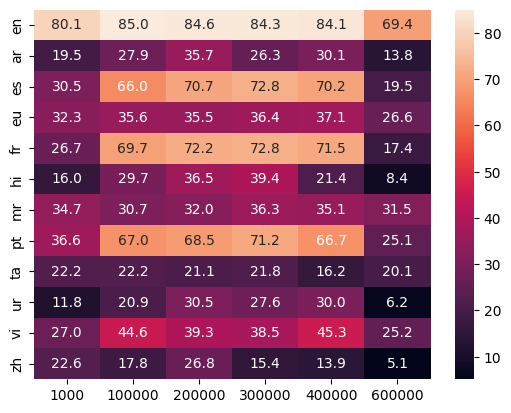

In [8]:
df = pd.read_csv(f'csv_files/{model}_f1-score.csv', index_col=0).sort_index() * 100
row_titles = ['en', 'ar', 'es', 'eu', 'fr', 'hi', 'mr', 'pt', 'ta', 'ur', 'vi', 'zh']
df = df.reindex(index=row_titles)
df = df.drop(columns=['best'])
heatmap = sns.heatmap(df, annot=True, fmt=".1f")
fig = heatmap.get_figure()
fig.savefig(f'{output_plot_path}/{model}_f1_score.pdf', bbox_inches='tight') 

          best     50000    100000    150000    200000
ar    0.258015  0.592041  0.141476  0.449219  0.305492
es    0.953157  0.865843  0.839069  0.975082  0.976616
eu    0.707166  0.720346  0.717473  0.667259  0.750607
fr    0.964026  0.873063  0.892876  0.981985  0.982041
hi    0.180724  0.161188  0.106905  0.220990  0.154406
pt    0.923876  0.825822  0.810327  0.961404  0.965061
ta    0.195765  0.241109  0.162498  0.131560  0.170172
ur    0.086568  0.393573  0.135843  0.238024  0.140202
vi    0.587178  0.689875  0.605371  0.872723  0.792418
code  0.928088  0.835329  0.734449  0.958462  0.954514


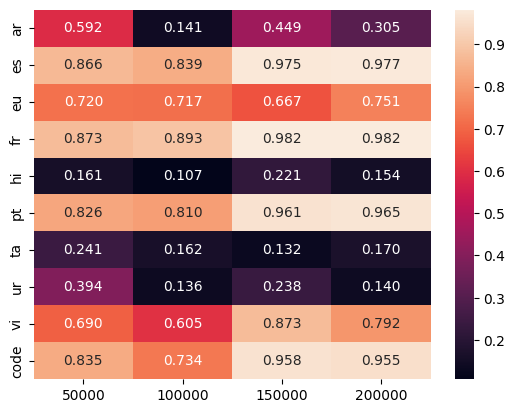

In [16]:
df = pd.read_csv(f'csv_files/{model}_{layer}_cos-similarity.csv', index_col=0)
print(df)
df = df.drop(columns=['best'])
heatmap = sns.heatmap(df, annot=True, fmt=".3f")
fig = heatmap.get_figure()
fig.savefig(f'{output_plot_path}/{model}_{layer}_cos-similarity.pdf', bbox_inches='tight') 

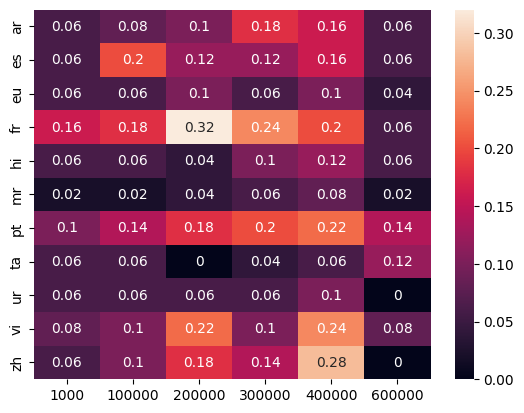

In [10]:
df = pd.read_csv(f'csv_files/{model}_{layer}_ovlp-rate_POS.csv', index_col=0).sort_index()
df = df.drop(columns=['best'])
heatmap = sns.heatmap(df.drop(['en', 'ca']), annot=True)
fig = heatmap.get_figure()
fig.savefig(f'{output_plot_path}/{model}_{layer}_ovlp-rate.pdf', bbox_inches='tight') 